In [7]:
import numpy as np
import zipfile
import pandas as pd
import time
import matplotlib.pyplot as plt
import pickle

C:\Users\doron\AppData\Local\Temp\ipykernel_16252\1990895599.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [42]:
import os
os.environ["KERAS_BACKEND"] = "torch" # alternatives: tf, jax
import keras

In [43]:
# Load data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [44]:
train_data.head

<bound method NDFrame.head of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pi

In [45]:
# Extract labels and features
train_labels = train_data['label'].values
train_images = train_data.drop('label', axis=1).values
test_labels = test_data['label'].values
test_images = test_data.drop('label', axis=1).values

In [46]:
from keras.utils import to_categorical

# Assuming train_labels and test_labels are loaded as pandas Series
# Convert integer labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [47]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [49]:
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout

In [50]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(28*28,)))    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [68]:
def create_model1():
    model = Sequential([
        Input(shape=(28*28,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [52]:
def create_model2():
    model = Sequential([
        Input(shape=(28*28,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [53]:
def create_model3():
    model = Sequential([
        Input(shape=(28*28,)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

In [54]:
def create_model4():
    model = Sequential([
        Input(shape=(28*28,)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

In [55]:
def create_model5():
    model = Sequential([
        Input(shape=(28*28,)),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [59]:
def train_and_evaluate(model_func, model_name):
    # Create the model
    model = model_func()

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Print model summary to show number of parameters in each layer
    model.summary()

    # Start timing the training process
    start_time = time.time()

    # Train the model
    history = model.fit(train_images, train_labels, batch_size = 128, validation_data=(test_images, test_labels), epochs=10, verbose=2)


    # Calculate the training time
    training_time = time.time() - start_time
    print("Training Time:", training_time, "seconds")

    # Serialize and save the history to disk
    with open(f'{model_name}_history.pkl', 'wb') as f:
        pickle.dump(history.history, f)

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Start timing the inference process
    start_time = time.time()

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)

    # Calculate the inference time
    inference_time = time.time() - start_time
    print("Inference Time:", inference_time, "seconds")

    print("Test Accuracy:", test_accuracy)

    print("Test loss:", test_loss)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 - 52s - 111ms/step - accuracy: 0.8048 - loss: 0.5616 - val_accuracy: 0.8415 - val_loss: 0.4450
Epoch 2/10
469/469 - 53s - 112ms/step - accuracy: 0.8571 - loss: 0.4003 - val_accuracy: 0.8726 - val_loss: 0.3651
Epoch 3/10
469/469 - 66s - 141ms/step - accuracy: 0.8722 - loss: 0.3561 - val_accuracy: 0.8639 - val_loss: 0.3728
Epoch 4/10
469/469 - 66s - 141ms/step - accuracy: 0.8801 - loss: 0.3310 - val_accuracy: 0.8705 - val_loss: 0.3620
Epoch 5/10
469/469 - 67s - 143ms/step - accuracy: 0.8861 - loss: 0.3107 - val_accuracy: 0.8800 - val_loss: 0.3232
Epoch 6/10
469/469 - 66s - 141ms/step - accuracy: 0.8918 - loss: 0.2958 - val_accuracy: 0.8783 - val_loss: 0.3374
Epoch 7/10
469/469 - 68s - 144ms/step - accuracy: 0.8953 - loss: 0.2859 - val_accuracy: 0.8850 - val_loss: 0.3181
Epoch 8/10
469/469 - 67s - 142ms/step - accuracy: 0.9002 - loss: 0.2710 - val_accuracy: 0.8867 - val_loss: 0.3096
Epoch 9/10
469/469 - 77s - 165ms/step - accuracy: 0.9022 - loss: 0.2632 - val_accuracy: 

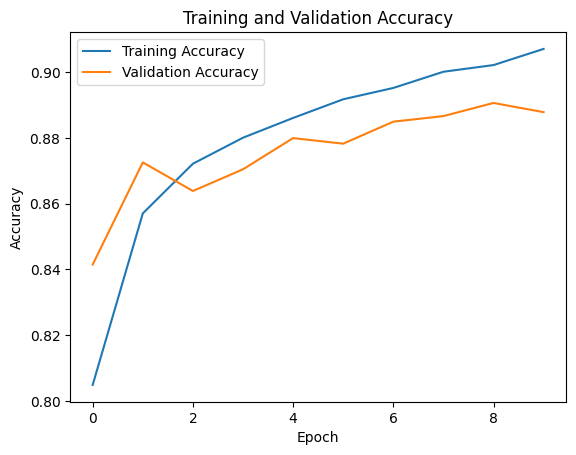

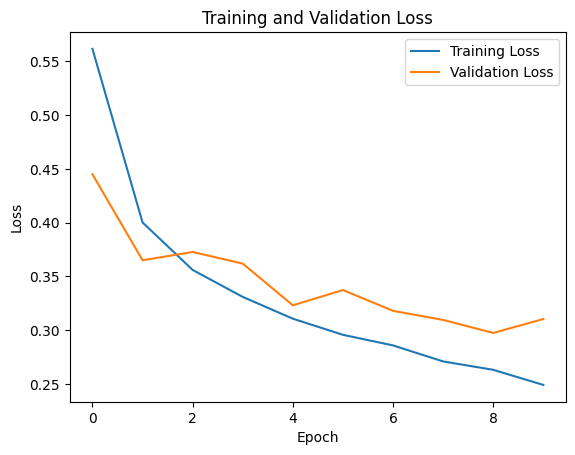

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8859 - loss: 0.3147
Inference Time: 10.023041009902954 seconds
Test Accuracy: 0.8878999948501587
Test loss: 0.3121733069419861


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 - 69s - 148ms/step - accuracy: 0.8195 - loss: 0.5114 - val_accuracy: 0.8569 - val_loss: 0.4063
Epoch 2/10
469/469 - 70s - 150ms/step - accuracy: 0.8646 - loss: 0.3770 - val_accuracy: 0.8681 - val_loss: 0.3604
Epoch 3/10
469/469 - 69s - 147ms/step - accuracy: 0.8790 - loss: 0.3329 - val_accuracy: 0.8819 - val_loss: 0.3203
Epoch 4/10
469/469 - 80s - 170ms/step - accuracy: 0.8877 - loss: 0.3082 - val_accuracy: 0.8772 - val_loss: 0.3279
Epoch 5/10
469/469 - 86s - 184ms/step - accuracy: 0.8917 - loss: 0.2922 - val_accuracy: 0.8882 - val_loss: 0.2996
Epoch 6/10
469/469 - 88s - 187ms/step - accuracy: 0.8990 - loss: 0.2764 - val_accuracy: 0.8829 - val_loss: 0.3144
Epoch 7/10
469/469 - 86s - 183ms/step - accuracy: 0.9022 - loss: 0.2633 - val_accuracy: 0.8858 - val_loss: 0.3128
Epoch 8/10
469/469 - 86s - 184ms/step - accuracy: 0.9062 - loss: 0.2509 - val_accuracy: 0.8874 - val_loss: 0.3144
Epoch 9/10
469/469 - 90s - 192ms/step - accuracy: 0.9103 - loss: 0.2419 - val_accuracy: 

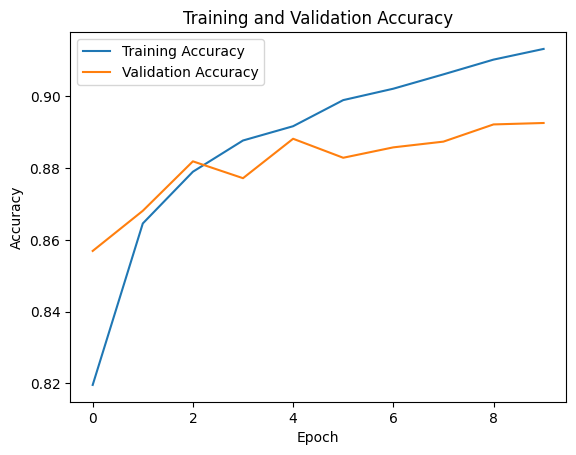

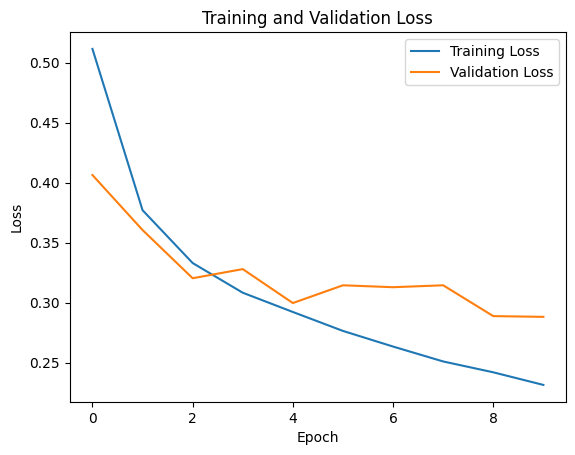

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8875 - loss: 0.3009
Inference Time: 12.496007919311523 seconds
Test Accuracy: 0.8925999999046326
Test loss: 0.2902286648750305


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 - 85s - 180ms/step - accuracy: 0.8084 - loss: 0.5412 - val_accuracy: 0.8595 - val_loss: 0.3938
Epoch 2/10
469/469 - 78s - 167ms/step - accuracy: 0.8616 - loss: 0.3824 - val_accuracy: 0.8650 - val_loss: 0.3718
Epoch 3/10
469/469 - 81s - 174ms/step - accuracy: 0.8740 - loss: 0.3466 - val_accuracy: 0.8797 - val_loss: 0.3248
Epoch 4/10
469/469 - 89s - 189ms/step - accuracy: 0.8838 - loss: 0.3154 - val_accuracy: 0.8820 - val_loss: 0.3233
Epoch 5/10
469/469 - 89s - 189ms/step - accuracy: 0.8888 - loss: 0.3006 - val_accuracy: 0.8791 - val_loss: 0.3292
Epoch 6/10
469/469 - 85s - 181ms/step - accuracy: 0.8931 - loss: 0.2842 - val_accuracy: 0.8842 - val_loss: 0.3108
Epoch 7/10
469/469 - 86s - 183ms/step - accuracy: 0.8989 - loss: 0.2702 - val_accuracy: 0.8871 - val_loss: 0.3081
Epoch 8/10
469/469 - 87s - 185ms/step - accuracy: 0.9033 - loss: 0.2588 - val_accuracy: 0.8832 - val_loss: 0.3119
Epoch 9/10
469/469 - 88s - 187ms/step - accuracy: 0.9062 - loss: 0.2494 - val_accuracy: 

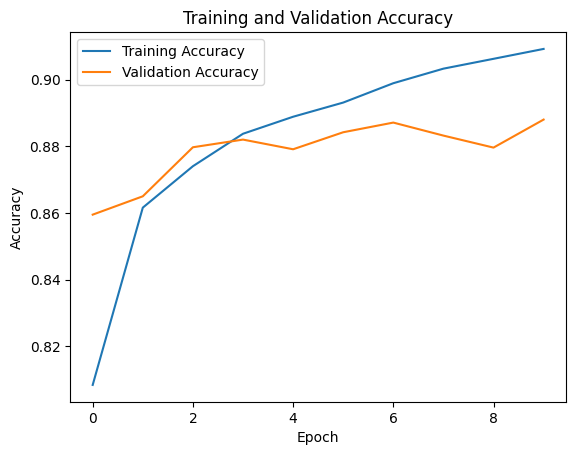

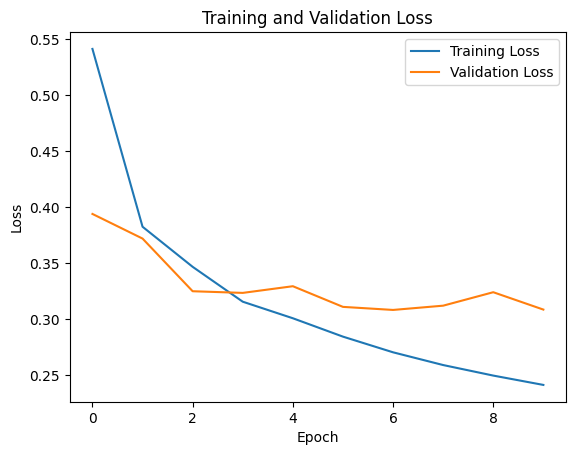

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8853 - loss: 0.3138
Inference Time: 12.001002550125122 seconds
Test Accuracy: 0.8880000114440918
Test loss: 0.3072088956832886


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
469/469 - 80s - 171ms/step - accuracy: 0.8300 - loss: 0.4799 - val_accuracy: 0.8393 - val_loss: 0.4503
Epoch 2/10
469/469 - 84s - 179ms/step - accuracy: 0.8710 - loss: 0.3573 - val_accuracy: 0.8640 - val_loss: 0.3690
Epoch 3/10
469/469 - 92s - 196ms/step - accuracy: 0.8816 - loss: 0.3227 - val_accuracy: 0.8488 - val_loss: 0.4122
Epoch 4/10
469/469 - 97s - 206ms/step - accuracy: 0.8886 - loss: 0.3026 - val_accuracy: 0.8709 - val_loss: 0.3622
Epoch 5/10
469/469 - 89s - 189ms/step - accuracy: 0.8953 - loss: 0.2873 - val_accuracy: 0.8609 - val_loss: 0.3884
Epoch 6/10
469/469 - 86s - 182ms/step - accuracy: 0.8989 - loss: 0.2738 - val_accuracy: 0.8747 - val_loss: 0.3343
Epoch 7/10
469/469 - 90s - 193ms/step - accuracy: 0.9021 - loss: 0.2616 - val_accuracy: 0.8797 - val_loss: 0.3287
Epoch 8/10
469/469 - 70s - 149ms/step - accuracy: 0.9057 - loss: 0.2534 - val_accuracy: 0.8827 - val_loss: 0.3352
Epoch 9/10
469/469 - 72s - 154ms/step - accuracy: 0.9077 - loss: 0.2472 - val_accuracy: 

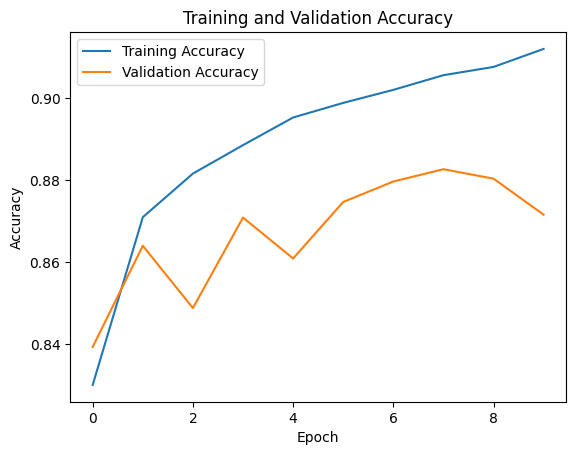

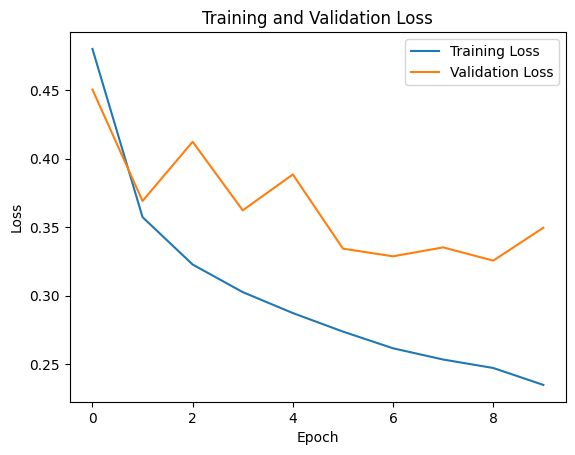

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8664 - loss: 0.3615
Inference Time: 10.782150268554688 seconds
Test Accuracy: 0.8715999722480774
Test loss: 0.35187259316444397


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 - 65s - 140ms/step - accuracy: 0.7676 - loss: 0.6699 - val_accuracy: 0.8393 - val_loss: 0.4451
Epoch 2/10
469/469 - 84s - 179ms/step - accuracy: 0.8376 - loss: 0.4498 - val_accuracy: 0.8615 - val_loss: 0.3869
Epoch 3/10
469/469 - 88s - 188ms/step - accuracy: 0.8542 - loss: 0.4065 - val_accuracy: 0.8714 - val_loss: 0.3554
Epoch 4/10
469/469 - 88s - 188ms/step - accuracy: 0.8630 - loss: 0.3826 - val_accuracy: 0.8714 - val_loss: 0.3463
Epoch 5/10
469/469 - 83s - 177ms/step - accuracy: 0.8691 - loss: 0.3638 - val_accuracy: 0.8788 - val_loss: 0.3317
Epoch 6/10
469/469 - 84s - 178ms/step - accuracy: 0.8754 - loss: 0.3492 - val_accuracy: 0.8839 - val_loss: 0.3198
Epoch 7/10
469/469 - 84s - 180ms/step - accuracy: 0.8755 - loss: 0.3380 - val_accuracy: 0.8801 - val_loss: 0.3203
Epoch 8/10
469/469 - 83s - 178ms/step - accuracy: 0.8812 - loss: 0.3271 - val_accuracy: 0.8851 - val_loss: 0.3155
Epoch 9/10
469/469 - 81s - 173ms/step - accuracy: 0.8827 - loss: 0.3209 - val_accuracy: 

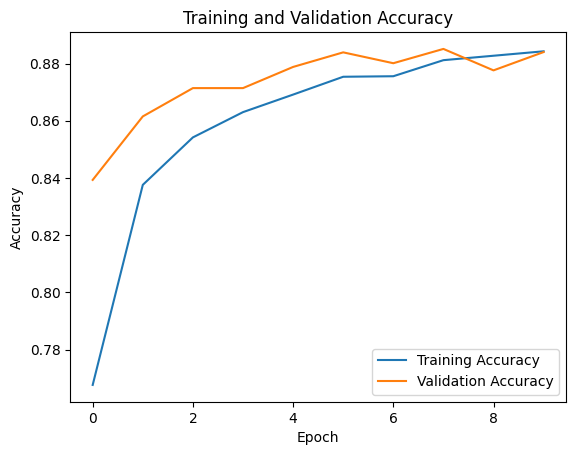

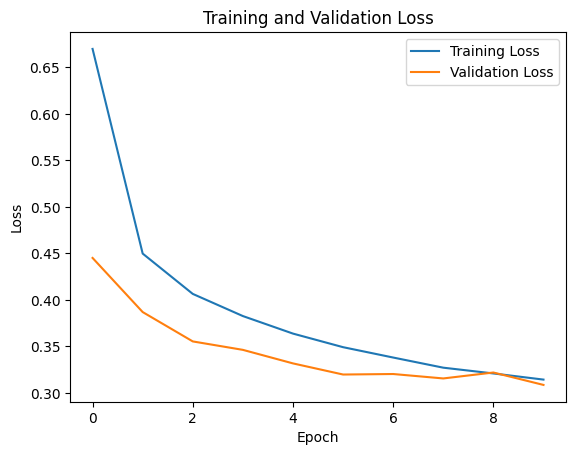

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8812 - loss: 0.3117
Inference Time: 13.479004621505737 seconds
Test Accuracy: 0.8840000033378601
Test loss: 0.31063714623451233


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,682 (924.54 KB)

 Trainable params: 235,914 (921.54 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
469/469 - 89s - 191ms/step - accuracy: 0.7548 - loss: 0.7043 - val_accuracy: 0.8234 - val_loss: 0.4703
Epoch 2/10
469/469 - 89s - 190ms/step - accuracy: 0.8196 - loss: 0.5102 - val_accuracy: 0.8476 - val_loss: 0.4157
Epoch 3/10
469/469 - 89s - 191ms/step - accuracy: 0.8327 - loss: 0.4699 - val_accuracy: 0.8637 - val_loss: 0.3813
Epoch 4/10
469/469 - 79s - 167ms/step - accuracy: 0.8386 - loss: 0.4498 - val_accuracy: 0.8623 - val_loss: 0.3828
Epoch 5/10
469/469 - 78s - 165ms/step - accuracy: 0.8443 - loss: 0.4356 - val_accuracy: 0.8669 - val_loss: 0.3650
Epoch 6/10
469/469 - 91s - 195ms/step - accuracy: 0.8486 - loss: 0.4223 - val_accuracy: 0.8698 - val_loss: 0.3614
Epoch 7/10
469/469 - 90s - 191ms/step - accuracy: 0.8533 - loss: 0.4108 - val_accuracy: 0.8698 - val_loss: 0.3555
Epoch 8/10
469/469 - 91s - 193ms/step - accuracy: 0.8547 - loss: 0.4037 - val_accuracy: 0.8705 - val_loss: 0.3582
Epoch 9/10
469/469 - 91s - 194ms/step - accuracy: 0.8554 - loss: 0.4013 - val_accuracy: 

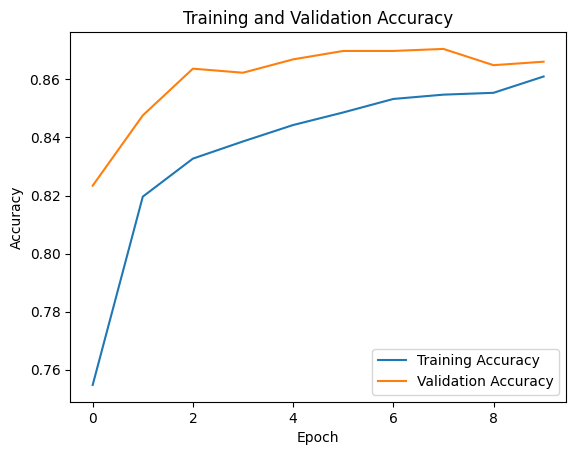

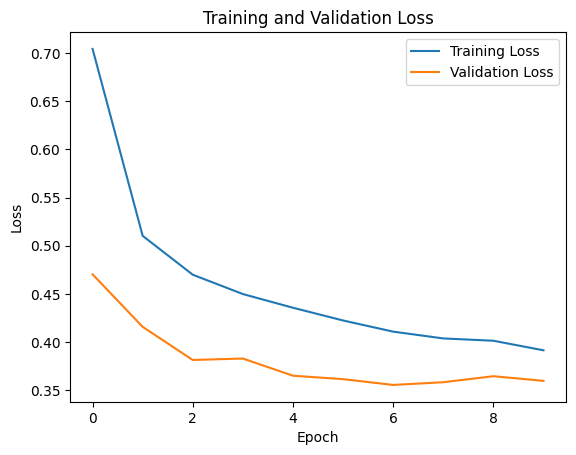

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.8641 - loss: 0.3619
Inference Time: 14.107002258300781 seconds
Test Accuracy: 0.866100013256073
Test loss: 0.360840767621994


In [60]:
# Train and evaluate each model
train_and_evaluate(create_model, "model0")
train_and_evaluate(create_model1, "model1")
train_and_evaluate(create_model2, "model2")
train_and_evaluate(create_model3, "model3")
train_and_evaluate(create_model4, "model4")
train_and_evaluate(create_model5, "model5")

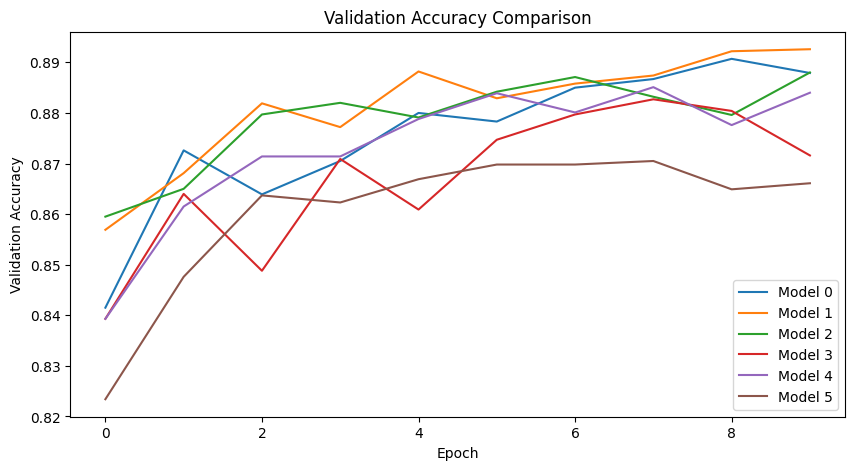

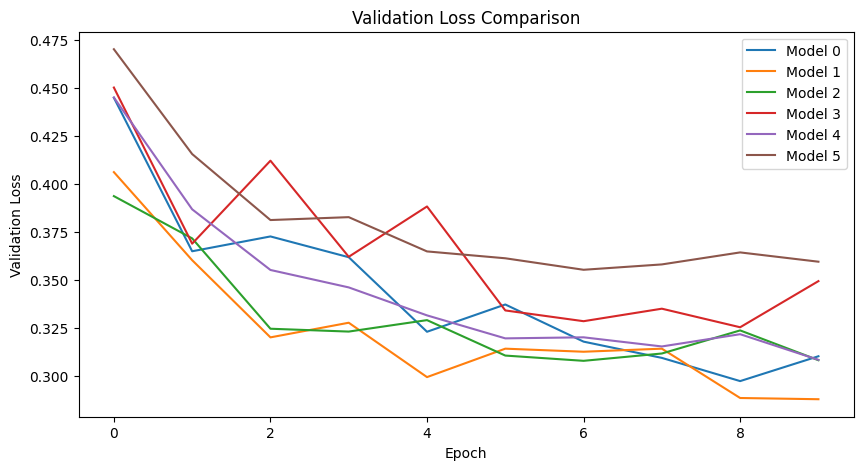

The best model based on validation accuracy is: Model 1


In [73]:
# Load history from pickle files
history_files = ['model0_history.pkl','model1_history.pkl', 'model2_history.pkl', 'model3_history.pkl', 'model4_history.pkl', 'model5_history.pkl']
histories = []
for file in history_files:
    with open(file, 'rb') as f:
        history = pickle.load(f)
        histories.append(history)

# Extract relevant metrics
metrics = {}
for i, history in enumerate(histories):
    model_name = f"Model {i}"
    metrics[model_name] = {
        'val_accuracy': history['val_accuracy'],
        'val_loss': history['val_loss']
    }

# Compare performance metrics
best_model = max(metrics, key=lambda x: max(metrics[x]['val_accuracy']))

# Visualize results
plt.figure(figsize=(10, 5))
for model_name, metric in metrics.items():
    plt.plot(metric['val_accuracy'], label=model_name)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

# Visualize validation loss
plt.figure(figsize=(10, 5))
for model_name, metric in metrics.items():
    plt.plot(metric['val_loss'], label=model_name)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

print(f"The best model based on validation accuracy is: {best_model}")


Q1.f answer: First of all we can see that the models have a decent performance with results of val accuracy ranging from 0.86 to almost 0.9.
For the val loss we can see that the result range from 0.37 to 0.28 which is again decent.
We can learn from this experiment what could help models in terms of model structure to improve its val accuracy and loss. 
It seems that for classification problems increasing the number of parameters in the model has the most impact on the performance of the model.
For this problem its seems that adding dropout layers and bath normalization with the same amount of parameters in the other layers actually hurts the performance of the model.


313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step


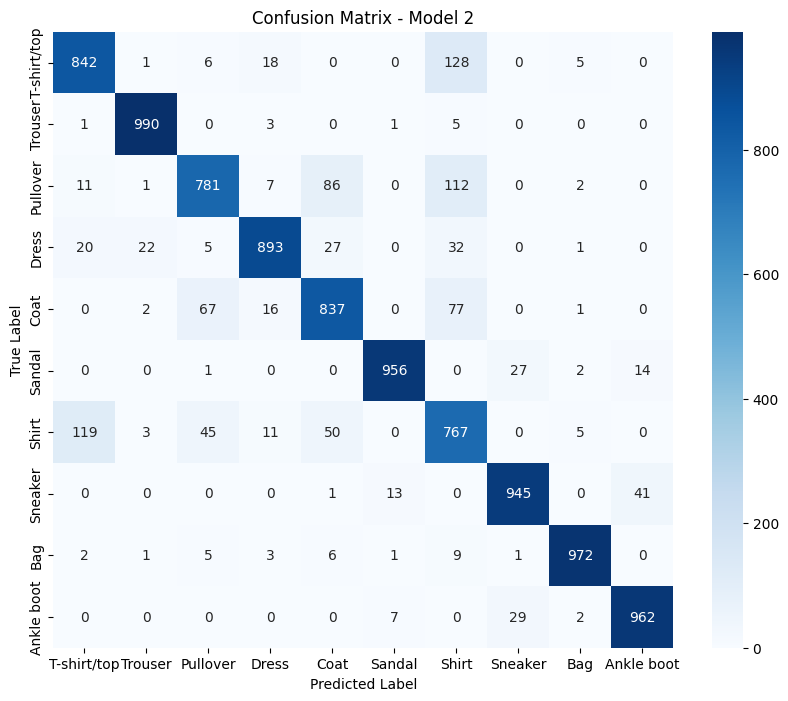

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the history of Model 2 from the pickle file
model1_history_file = 'model1_history.pkl'  # Replace with the actual filename/path
with open(model1_history_file, 'rb') as f:
    model1_history = pickle.load(f)

# Extract relevant information from the history
val_loss = model1_history['val_loss']
val_accuracy = model1_history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy)

# Load the model architecture and compile it
model1 = create_model1()  # Assuming create_model2 function is defined
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
               metrics=['accuracy'])

# Train the model up to the best epoch
model1.fit(train_images, train_labels, epochs=best_epoch+1, batch_size=128, verbose=0)

# Make predictions on the test set
test_predictions_model1 = model1.predict(test_images)
predicted_labels_model1 = np.argmax(test_predictions_model1, axis=1)

# Convert one-hot encoded test_labels back to categorical labels
test_labels_categorical = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix_model1 = confusion_matrix(test_labels_categorical, predicted_labels_model1)


# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model 1')
plt.show()


Q1.g answer: from this part we can see that mostly the model makes the correct classification, but we can see that for the cases of: shirt, coat, pullover and T-shirt/top the model makes many mistakes.
This makes sense as it is sometimes hard even for humans to discern which is which. We can also see that the model confuses ankle boot, sneaker and sandal, which again makes sense.   

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from multiprocessing import Pool, cpu_count
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\doron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\doron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Load the training data
train_data = pd.read_csv('tweet_sentiment.csv')

In [9]:
# Explore the data
print(train_data.head())
print(train_data.info())

   polarity    tweet_id                                              tweet
0         1  2049966842  @_CrC_ WOOT! i'm great. thanks. we are the kin...
1         1  2062338304                              @toytoyy ayeeee girl 
2        -1  2032451037  had lovely dinner up in the drummonds. wreaked...
3         1  1993541290  Going to the USS intreped  just saw ground zer...
4        -1  2204381262  Busted my ass infront of tin room tonight. Mis...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1400000 non-null  int64 
 1   tweet_id  1400000 non-null  int64 
 2   tweet     1400000 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.0+ MB
None


In [10]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords using set intersection for faster lookup
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [11]:
train_data['cleaned_text'] = train_data['tweet'].apply(preprocess_text)

In [12]:
# Save training data
train_data.to_csv('preprocessed_train_data.csv', index=False)

In [13]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['cleaned_text'], train_data['polarity'], test_size=0.2, random_state=42)

In [14]:
# Feature Extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [15]:
# Model Training with Linear SVC
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train)

c:\Users\doron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [16]:
# Model Evaluation
svc_y_pred = svc_model.predict(X_val_tfidf)
svc_accuracy = accuracy_score(y_val, svc_y_pred)
print("Linear SVC Validation Accuracy:", svc_accuracy)

Linear SVC Validation Accuracy: 0.7724607142857143


In [17]:
# Predictions on Test Data using Linear SVC
test_data = pd.read_csv('tweet_sentiment_test.csv')
test_data['cleaned_text'] = test_data['tweet'].apply(preprocess_text)
X_test_tfidf = tfidf_vectorizer.transform(test_data['cleaned_text'])
test_data['polarity'] = svc_model.predict(X_test_tfidf)

In [18]:
# Save predictions
test_data[['tweet_id', 'polarity']].to_csv('sentiment_319091294_svc.csv', index=False)

Q2 Answer: I chose to implement a sentiment analysis model using TF-IDF (Term Frequency-Inverse Document Frequency) for feature extraction and Linear SVC (Support Vector Classifier) for classification. These techniques were selected for their effectiveness, simplicity, and suitability for the sentiment analysis task. TF-IDF efficiently captures word importance, enhancing interpretability, while Linear SVC is known for its ability to learn linear decision boundaries, making it well-suited for sentiment analysis. Considering the model's performance on the validation data (77.25% accuracy), I expect it to perform similarly well on the test data, with an accuracy likely falling within the range of 70% to 80% since there might be big diffrences between the tweet_sentiment_ and the tweet_sentiment_test data with more edge cases.